https://medium.com/@datamonsters/text-preprocessing-in-python-steps-tools-and-examples-bf025f872908

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
!ls ../data

science.xml


In [3]:
# its actual html, but whatever
xmlstring = open('../data/science.xml').read()

In [4]:
from lxml import html

In [5]:
tree = html.fromstring(xmlstring)

In [6]:
abstracts = list(filter(lambda x: x.tag=='abstract_text', list(tree.iter())))

In [7]:
abstracts = list(map(lambda x: x.text_content(), abstracts))

In [8]:
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

notallowed = {'a','the','of','and','in','is','that','for','this','was','by','are','at',
              'an','it','to','on','as','if','is','by','for','not','no','all','than','be',
              'or', 'has', 'been', 'their', 'may', 'such',
              'q','w','e','r','t','y','u','i','o','p','s','d','f','g','h','j','k','l',
              'z','x','c','v','b','n','m','but','can','had','have','here','into', 'ii',
              'our','we','show','these','use','used','using','were','which','with','from'}

def preprocess(x):
    tokens = word_tokenize(x)
    words = list(filter(lambda w: w.isalpha(), tokens))
    words = list(map(lambda x: x.lower(), words))
    #porter = PorterStemmer()
    #words = list(map(lambda word: porter.stem(word), words))    
    words = list(filter(lambda x: x not in notallowed, words))
    return ' '.join(words)

In [9]:
text = list(map(preprocess, abstracts))

- Number of unique words
- Topic (i.e. research field)
- Title
- Number of authors
- Date


- Keywords?
- Author names?

# abstracts

In [10]:
journals = tree.getchildren()[1].getchildren()

In [11]:
journals[0].getchildren()[1].getchildren()[1].getchildren()[-1].getchildren()[0].text_content()

'\\n                        \\n                            Up to 50% of the increase in marine animal biodiversity through the Cenozoic at the genus level has been attributed to a sampling bias termed "the Pull of the Recent," the extension of stratigraphic ranges of fossil taxa by the relatively complete sampling of the Recent biota. However, 906 of 958 living genera and subgenera of bivalve mollusks having a fossil record occur in the Pliocene or Pleistocene. The Pull of the Recent thus accounts for only 5% of the Cenozoic increase in bivalve diversity, a major component of the marine record, suggesting that the diversity increase is likely to be a genuine biological pattern.\\n                        \\n                    '

In [12]:
def abstract_func(x):
    try:
        return x.find('static_data').find('fullrecord_metadata').find('abstracts').text_content()   
    except:
        return ''
full_abstracts = list(map(abstract_func, journals))

In [13]:
full_abstracts[2]

'\\n                    \\n                        \\n                            A persistent reversal in the expected polarity of the initiation of vertically polarized shear waves that graze the D" layer (the layer at the boundary between the outer core and the lower mantle of Earth) in some regions starts at the arrival time of horizontally polarized shear waves. Full waveform modeling of the split shear waves for paths beneath the Caribbean requires azimuthal anisotropy at the base of the mantle. Models with laterally coherent patterns of transverse isotropy with the hexagonal symmetry axis of the mineral phases tilted from the vertical by as much as 20degrees are consistent with the data. Small-scale convection cells within the mantle above the D" layer may cause the observed variations by inducing laterally variable crystallographic or shape-preferred orientation in minerals in the D" layer.\\n                        \\n                    \\n                '

In [14]:
processed_abstracts = list(map(preprocess, full_abstracts))

In [15]:
def title_func(x):    
    return x.find('static_data').find('summary').find('titles').getchildren()[-1].text_content()
titles = list(map(title_func, journals))

In [16]:
journals[-1].find('static_data').find('summary').find('titles').getchildren()[-1].text_content()

'NEUROSCIENCE Dynamics of cortical dendritic membrane potential and spikes in freely behaving rats'

In [17]:
journals[0].find('static_data').find('item').find('bib_id').text_content()

'300 (5622): 1133-1135 MAY 16 2003'

# unique words

In [18]:
character_count = list(map(lambda x: len(preprocess(x)), full_abstracts))

# keywords

In [19]:
journals[0].getchildren()[1].getchildren()[-1].getchildren()[-1].text_content()

'\\n                    FOSSIL RECORD\\n                    BIODIVERSITY\\n                    DIVERSIFICATION\\n                    ORIGINATION\\n                    EXTINCTION\\n                    PAST\\n                '

# number of authors

In [20]:
journals[0].getchildren()[1].getchildren()[0].getchildren()[3].getchildren()

[<Element name at 0x1605ef9f8>,
 <Element name at 0x1605efa48>,
 <Element name at 0x1605ef598>,
 <Element name at 0x1605efae8>,
 <Element name at 0x1605efb38>]

In [21]:
def num_authors_func(x):
    try:
        return len(x.getchildren()[1].getchildren()[0].getchildren()[3].getchildren())
    except:
        return -1
num_authors = list(map(num_authors_func, journals))

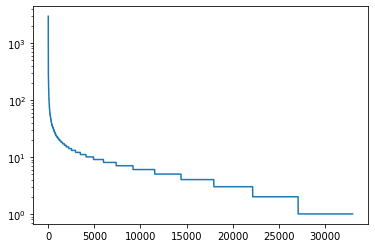

In [22]:
import matplotlib.pyplot as plt
plt.plot(sorted(num_authors)[::-1])
plt.yscale('log')

# Year

In [23]:
journals[0].getchildren()[1].getchildren()[-1].getchildren()[1].text_content().split(' ')[-1]

'2003'

In [24]:
def year_func(x):
    try:
        return x.find('static_data').find('item').find('bib_id').text_content().split(' ')[-1 ]
    except:
        return 'None'

years = list(map(year_func, journals))

In [25]:
journals[2].getchildren()

[<Element uid at 0x15f17a818>,
 <Element static_data at 0x1611d04f8>,
 <Element dynamic_data at 0x1611d0908>]

In [26]:
years[:10]

['2003',
 '2000',
 '2004',
 '2000',
 '2015',
 '1993',
 '2005',
 '1992',
 '1999',
 '2003']

In [27]:
len(years)

33012

In [28]:
len(num_authors)

33012

In [29]:
len(character_count)

33012

In [30]:
len(abstracts)

22496

In [31]:
len(full_abstracts)

33012

In [32]:
import seaborn as sns
from collections import Counter
x = np.array(list(map(lambda x: len(x.split(' ')), processed_abstracts)))

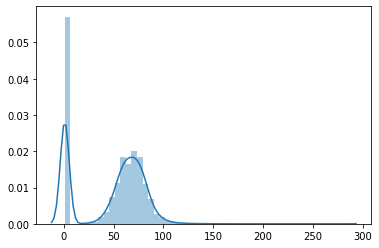

In [33]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
_ = sns.distplot(x, ax=ax)

In [34]:
idx = x > 30 # filter out abstracts less than 30 characters
filtered_abstracts = list(np.array(processed_abstracts)[idx])

# Model selection

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


# https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/
count_vect = CountVectorizer()
dtm_tf = count_vect.fit_transform(filtered_abstracts)

In [39]:
n=5
lda_tf = LatentDirichletAllocation(n_components=n, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda_tf.fit(dtm_tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [40]:
# https://markroxor.github.io/gensim/static/notebooks/gensim_news_classification.html#topic=0&lambda=1&term=
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, count_vect)

/Users/jmorton/miniconda3/envs/textminer/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.053460  0.132376       1        1  30.336979
1     -0.181289  0.075772       2        1  28.993152
2      0.237837  0.079397       3        1  20.284777
3     -0.152396  0.000180       4        1  11.905221
0      0.042389 -0.287725       5        1   8.479871, topic_info=      Category         Freq           Term        Total  loglift  logprob
6287   Default  7763.000000          cells  7763.000000  30.0000  30.0000
6280   Default  5438.000000           cell  5438.000000  29.0000  29.0000
35927  Default  5901.000000        protein  5901.000000  28.0000  28.0000
26215  Default  2351.000000           mice  2351.000000  27.0000  27.0000
35935  Default  3127.000000       proteins  3127.000000  26.0000  26.0000
48921  Default  2059.000000          years  2059.000000  25.0000  25.0000
41522  Default  2282.000000        species  2282.000000  24.0000  24.0000
12198  Default  3460.000000            dna  3460.000000  23.0000  23.0000
14949  Default  2802.000000     expression  2802.000000  22.0000  22.0000
17095  Default  2622.000000          genes  2622.000000  21.0000  21.0000
19700  Default  3402.000000          human  3402.000000  20.0000  20.0000
17098  Default  1694.000000        genetic  1694.000000  19.0000  19.0000
17064  Default  3724.000000           gene  3724.000000  18.0000  18.0000
5813   Default  1899.000000         carbon  1899.000000  17.0000  17.0000
36694  Default  2092.000000        quantum  2092.000000  16.0000  16.0000
4287   Default  2145.000000        binding  2145.000000  15.0000  15.0000
29006  Default  1564.000000        neurons  1564.000000  14.0000  14.0000
7316   Default  1105.000000        climate  1105.000000  13.0000  13.0000
17433  Default  1392.000000         global  1392.000000  12.0000  12.0000
37306  Default  2347.000000       receptor  2347.000000  11.0000  11.0000
32672  Default  2157.000000            per  2157.000000  10.0000  10.0000
27436  Default  2860.000000           more  2860.000000   9.0000   9.0000
14616  Default  1187.000000      evolution  1187.000000   8.0000   8.0000
45440  Default  1870.000000  transcription  1870.000000   7.0000   7.0000
12662  Default  3761.000000         during  3761.000000   6.0000   6.0000
23012  Default  1572.000000         kinase  1572.000000   5.0000   5.0000
20230  Default   970.000000            ice   970.000000   4.0000   4.0000
8080   Default  2907.000000        complex  2907.000000   3.0000   3.0000
17117  Default   951.000000         genome   951.000000   2.0000   2.0000
44126  Default  1739.000000    temperature  1739.000000   1.0000   1.0000
...        ...          ...            ...          ...      ...      ...
17117   Topic5   629.619786         genome   951.920127   2.0541  -5.3278
40037   Topic5   500.331325      selection   719.952219   2.1036  -5.5576
41522   Topic5  1241.655271        species  2282.797505   1.8585  -4.6487
17098   Topic5   960.949912        genetic  1694.629149   1.9002  -4.9050
21032   Topic5   436.444049    individuals   643.894702   2.0786  -5.6942
1538    Topic5   581.121537          among   978.043909   1.9469  -5.4079
34672   Topic5   556.206246     population   957.544699   1.9242  -5.4518
17121   Topic5   342.741279        genomic   503.722640   2.0824  -5.9359
17095   Topic5   896.979486          genes  2622.220641   1.3947  -4.9739
38877   Topic5   260.356081           risk   368.712781   2.1195  -6.2108
12131   Topic5   381.418046      diversity   710.289510   1.8457  -5.8290
27436   Topic5   788.938936           more  2860.956287   1.1793  -5.1022
11407   Topic5   335.083657    differences   624.938351   1.8442  -5.9585
19700   Topic5   726.730170          human  3402.871882   0.9237  -5.1843
17989   Topic5   282.449114         groups   521.774009   1.8537  -6.1294
33985   Topic5   346.593204          plant   844.094266   1.5774  -5.9247
33997   Topic5   323.576086

In [41]:
import umap
topic_props = lda_tf.transform(dtm_tf)
T = np.log(topic_props)
Y = T - T.mean(axis=1).reshape(-1, 1)
Y = Y - Y.mean(axis=0)
umap_model = umap.UMAP(n_neighbors=20, metric='euclidean')
umap_model.fit(Y)

/Users/jmorton/miniconda3/envs/textminer/lib/python3.7/site-packages/umap/rp_tree.py:450: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "make_euclidean_tree" failed type inference due to: Cannot unify RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none) and RandomProjectionTreeNode(none, bool, array(float32, 1d, C), float64, RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none), RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none)) for '$14.16', defined at /Users/jmorton/miniconda3/envs/textminer/lib/python3.7/site-packages/umap/rp_tree.py (457)

File "../../../../miniconda3/envs/textminer/lib/python3.7/site-packages/umap/rp_tree.py", line 457:
def make_euclidean_tree(data, indices, rng_state, leaf_size=30):
    <source elided>

        left_node = make_euclidean_tree(data, left_indices, rng_state, leaf_size)
        ^

[1] During: resolving callee type: recursive(t

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=20, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=False)

In [42]:
embedding = umap_model.transform(Y)

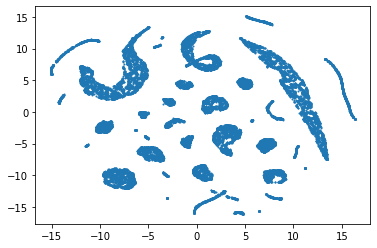

In [43]:
plt.scatter(embedding[:, 0], embedding[:, 1], s=1)

In [44]:
params = {'tsne': embedding, 'lda': lda_tf, 'wfreq': dtm_tf, 'terms': count_vect}

In [46]:
import pickle
with open('../results/params_dump.bin', 'wb') as fp:
    pickle.dump(params, fp)